In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!ls data/female

female_000000.jpg female_001750.jpg female_003500.jpg female_005250.jpg
female_000001.jpg female_001751.jpg female_003501.jpg female_005251.jpg
female_000002.jpg female_001752.jpg female_003502.jpg female_005252.jpg
female_000003.jpg female_001753.jpg female_003503.jpg female_005253.jpg
female_000004.jpg female_001754.jpg female_003504.jpg female_005254.jpg
female_000005.jpg female_001755.jpg female_003505.jpg female_005255.jpg
female_000006.jpg female_001756.jpg female_003506.jpg female_005256.jpg
female_000007.jpg female_001757.jpg female_003507.jpg female_005257.jpg
female_000008.jpg female_001758.jpg female_003508.jpg female_005258.jpg
female_000009.jpg female_001759.jpg female_003509.jpg female_005259.jpg
female_000010.jpg female_001760.jpg female_003510.jpg female_005260.jpg
female_000011.jpg female_001761.jpg female_003511.jpg female_005261.jpg
female_000012.jpg female_001762.jpg female_003512.jpg female_005262.jpg
female_000013.jpg female_001763.jpg female_003513.jpg female_005

In [3]:
from glob import glob
femalepath = glob('./data/female/*.jpg')
malepath = glob('./data/male/*.jpg')

femalepath

['./data/female/female_003513.jpg',
 './data/female/female_005162.jpg',
 './data/female/female_001304.jpg',
 './data/female/female_001462.jpg',
 './data/female/female_005604.jpg',
 './data/female/female_003275.jpg',
 './data/female/female_005610.jpg',
 './data/female/female_003261.jpg',
 './data/female/female_000768.jpg',
 './data/female/female_001476.jpg',
 './data/female/female_006319.jpg',
 './data/female/female_001310.jpg',
 './data/female/female_004268.jpg',
 './data/female/female_003507.jpg',
 './data/female/female_002619.jpg',
 './data/female/female_005176.jpg',
 './data/female/female_006457.jpg',
 './data/female/female_001338.jpg',
 './data/female/female_000026.jpg',
 './data/female/female_004240.jpg',
 './data/female/female_002631.jpg',
 './data/female/female_005638.jpg',
 './data/female/female_002157.jpg',
 './data/female/female_003249.jpg',
 './data/female/female_004526.jpg',
 './data/female/female_000740.jpg',
 './data/female/female_006331.jpg',
 './data/female/female_00099

In [4]:
len(femalepath), len(malepath)

(7000, 7000)

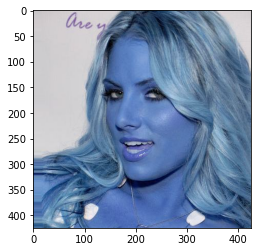

In [5]:
# show one image
path = femalepath[2]
img = cv2.imread(path)

plt.imshow(img)
plt.show()

In [6]:
# convert image into grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(425, 426)

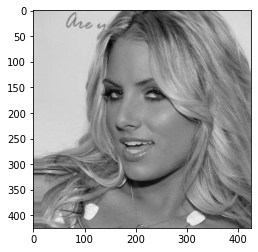

In [7]:
plt.imshow(gray,cmap='gray')

In [8]:
# use haar cascade classifier
haar = cv2.CascadeClassifier('./model/haarcascade_frontalface_default.xml')

faces = haar.detectMultiScale(gray,1.5,2)
print(faces)

[[ 49  57 273 273]]


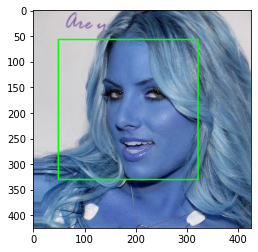

In [9]:
for x,y,w,h in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(img)

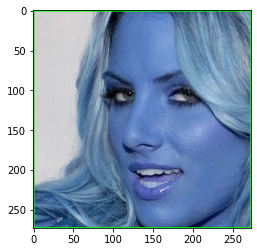

In [10]:
# crop the image
crop_img = img[y:y+h,x:x+h]
plt.imshow(crop_img)

In [11]:
# save the image
# cv2.imwrite('f_01.png',crop_img)

In [13]:
# Apply to all the images
def extract_images(path,gender,i):
    img = cv2.imread(path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = haar.detectMultiScale(gray,1.5,5)
    for x,y,w,h in faces:
        roi = img[y:y+h,x:x+w]
        if gender == 'male':
            cv2.imwrite('./data/crop/male_crop/{}_{}.png'.format(gender,i),roi)
        else:
            cv2.imwrite('./data/crop/female_crop/{}_{}.png'.format(gender,i),roi)


# extract_images(femalepath[0],'female',1)


In [14]:
for i,path in enumerate(femalepath):
    try:

        extract_images(path,'female',i)
        print('INFO: {}/{} processed sucessfully'.format(i,len(femalepath)))
        
    except:
        print('INFO: {}/{} cannot be processed'.format(i,len(femalepath)))

INFO: 0/7000 processed sucessfully
INFO: 1/7000 processed sucessfully
INFO: 2/7000 processed sucessfully
INFO: 3/7000 processed sucessfully
INFO: 4/7000 processed sucessfully
INFO: 5/7000 processed sucessfully
INFO: 6/7000 processed sucessfully
INFO: 7/7000 processed sucessfully
INFO: 8/7000 processed sucessfully
INFO: 9/7000 processed sucessfully
INFO: 10/7000 processed sucessfully
INFO: 11/7000 processed sucessfully
INFO: 12/7000 processed sucessfully
INFO: 13/7000 processed sucessfully
INFO: 14/7000 processed sucessfully
INFO: 15/7000 processed sucessfully
INFO: 16/7000 processed sucessfully
INFO: 17/7000 processed sucessfully
INFO: 18/7000 processed sucessfully
INFO: 19/7000 processed sucessfully
INFO: 20/7000 processed sucessfully
INFO: 21/7000 processed sucessfully
INFO: 22/7000 processed sucessfully
INFO: 23/7000 processed sucessfully
INFO: 24/7000 processed sucessfully
INFO: 25/7000 processed sucessfully
INFO: 26/7000 processed sucessfully
INFO: 27/7000 processed sucessfully
IN

In [15]:
for i,path in enumerate(malepath):
    try:

        extract_images(path,'male',i)
        print('INFO: {}/{} processed sucessfully'.format(i,len(malepath)))
        
    except:
        print('INFO: {}/{} cannot be processed'.format(i,len(malepath)))

INFO: 0/7000 processed sucessfully
INFO: 1/7000 processed sucessfully
INFO: 2/7000 processed sucessfully
INFO: 3/7000 processed sucessfully
INFO: 4/7000 processed sucessfully
INFO: 5/7000 processed sucessfully
INFO: 6/7000 processed sucessfully
INFO: 7/7000 processed sucessfully
INFO: 8/7000 processed sucessfully
INFO: 9/7000 processed sucessfully
INFO: 10/7000 processed sucessfully
INFO: 11/7000 processed sucessfully
INFO: 12/7000 processed sucessfully
INFO: 13/7000 processed sucessfully
INFO: 14/7000 processed sucessfully
INFO: 15/7000 processed sucessfully
INFO: 16/7000 processed sucessfully
INFO: 17/7000 processed sucessfully
INFO: 18/7000 processed sucessfully
INFO: 19/7000 processed sucessfully
INFO: 20/7000 processed sucessfully
INFO: 21/7000 processed sucessfully
INFO: 22/7000 processed sucessfully
INFO: 23/7000 processed sucessfully
INFO: 24/7000 processed sucessfully
INFO: 25/7000 processed sucessfully
INFO: 26/7000 processed sucessfully
INFO: 27/7000 processed sucessfully
IN